In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Bayesian vs. Frequentist Estimation
There are distint differences from frequentists/classical analysis and Bayesian data analysis. The main difference is how it treats model parameters. Both aim to learn more about parameters $\theta$. Where $\theta$ contains a fixed but unknown amount of elements that is associated with the population. 
## Bayesian 
- Formulate probabilistic statments about events before collecting additional data
- These subjective probabilities are called priors
- Assigns guess to $\theta$, and give it a prior probability distribution labeled $p(\theta)$
Updating our prior from the sample data, so the data should contribute to learning about $\theta$
## Frequentist
- All estimations are based only on the observed data
- collects samples of observations and combine it with statistial models to produce an estimate $\hat{\theta}$
- uncertiainy comes from the fact that its a sample, and uncertainty is expressed by standard errors to each element of $\hat{\theta}$
Frequentists start with a blank mind for $\theta$. They collect data to produce the estimiate $\hat{\theta}$. Then they formalize the characteristics and uncertainty of $\hat{\theta}$ for a finite sample and a hypothetical large sample (asymptotic) case. 

There are frameworks to relate $\theta$ to the observed data $y$ and a matrix of explanatory variables $X$. This is formalized in the likelihood function
$$p\,(y\mid\theta , X)$$


While Bayesians combine the piror and likelihood using Baye's rule to derive the posterior distribution (the updated version of the prior).

$$
p\,(\theta \mid y, X)
= \frac{p\,(\theta, y \mid X)}{p\,(y \mid X)}
= \frac{p\,(\theta)\,p\,(y \mid \theta, X)}{p\,(y \mid X)}
\propto p\,(\theta)\,p\,(y \mid \theta, X)
$$

where $p\,(y \mid X)$ is the marginal likelihood

## Frequentist approach

Consider a dataset of stock returns. From this data, we can compute the daily returns and determine whether each day’s return is positive or negative. If a day’s return is positive, we label it as an “up day” and set the random variable **$Y=1$**. Conversely, if the return is negative, we label it as a “down day” and set **$Y=0$**. This is modeled by the probability desnity of Y which can be modeled by the **Bernoulli distribution**: $$p\,(y\mid\theta) = \theta^y(1-\theta)^{1-y}$$ where $\theta\in[0,1]$ represents the probaility of an "up day". 

In [5]:
## Get Stock Return Data ##
Tickers = "NVDA"
data = yf.download(Tickers, period='1y', progress=False, auto_adjust=False)
returns = data["Close"].pct_change().dropna()

## Determine if up or down day ## 
days_direction = returns > 0
days_direction.head()

Ticker,NVDA
Date,
2024-10-09,False
2024-10-10,True
2024-10-11,False
2024-10-14,True
2024-10-15,False


### Extending to Multiple Days

Now, suppose we observe n independent trading days of returns for the same stock, let:
$$y=(y_1,y_2,\ldots,y_n)$$ 
Assuming independence between days, the joint proability/likelihood of observing that exact sequence is the product of the individual Bernoulli probabilities.
$$p\,(\mathbf{y} \mid \theta) = \prod_{i=1}^{n} \theta^{y_i}(1 - \theta)^{1 - y_i}.$$

Let $k = \Sigma_{i=1}^{n}y_i$, simplifying the equation:
$$p(\mathbf{y} \mid \theta) = \theta^{k}(1 - \theta)^{n - k}.$$

We only care about the number of successes/up days k, we must include the number of possible arrangements of the k successes among n days, given by the binomial coefficent $\binom{n}{k}$.

Thus, the probability of observing $k$ up days out of $n$ is given by the Binomial distribution:
$$
p\,(k \mid \theta) = \binom{n}{k} \, \theta^k (1 - \theta)^{n - k}.
$$

### Estimating Parameter

Before we can use any of the probability distributions we must estimate the parameter $\hat{\theta}$ according the frequentist approach. We can estimate the maximum likelihood by getting the log likelihood and finding the maximum giving the formula
$$\hat{\theta}_{ML} = \frac{\Sigma y_i}{n}.$$

In [6]:
theta_ml = (days_direction.sum() / len(days_direction)).values[0]
print(f'{round(theta_ml * 100, 1)}%')

53.8%


Notice that the frequentist approach gives a single point as our estimate. Theta_ml represent our chance of getting an up day.

In [7]:
## Potnetially add bias and varianece calculation

### Simulating chance of a number of up days

Pluging in our maximum liklihood estimation into the binomial distribution and generating 10 million simulations of up days for the total amount of trading days we get this distribution:

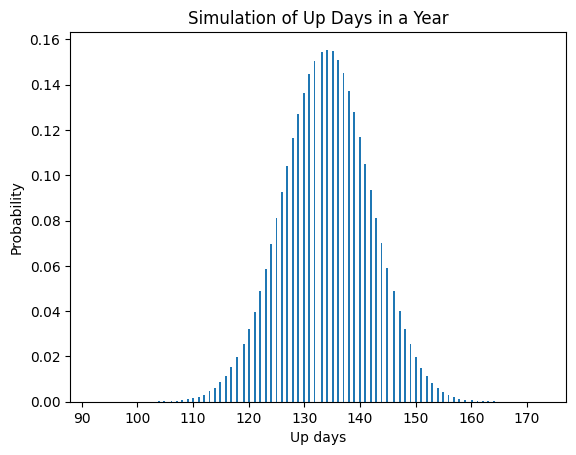

In [83]:
rng = np.random.default_rng() 
up_days = rng.binomial(n=len(days_direction), p=theta_ml, size=10_000_000)
plt.hist(up_days, bins=len(days_direction), density=True, align='mid')
plt.title("Simulation of Up Days in a Year")
plt.ylabel("Probability")
plt.xlabel("Up days")
plt.show()